The ***Pandas set index*** function give you the ability to designate a column or field as the index. Having an index on your dataframes allow you to access additional features that we will be going over in this tutorial. 

<h2>RDBMS vs Pandas Index</h2>

> It's worth mentioning that there is a difference when you talk about a database index versus a Pandas index.

* ***RDBMS (relational database management system):*** 
Tables in a database may contain an index. The index will be on a column or a set of columns that are in the table. An index will allow queries on columns that are part of the index to run faster. In the database world, indexes are used to help speed up queries. This is not how you should look at a Pandas index.

* ***Pandas:***
I would picture the Pandas index as a row identifier very similar to the one in an Excel spreadsheet. But with the difference that the Pandas index does not have to be unique for every value in the dataframe or series.

Also note that you should also not think of the index as a primary key in a database. As stated before the index does not have to be unique but in a database the primary key will always be unique. Note that a lot of people will treat the Pandas index as a unique identifier including mysef. You just have to be extra sure your index is unique since Pandas will not do that for you.

Let's go over a simple example...

But before we continue, watch the supplemental video below.

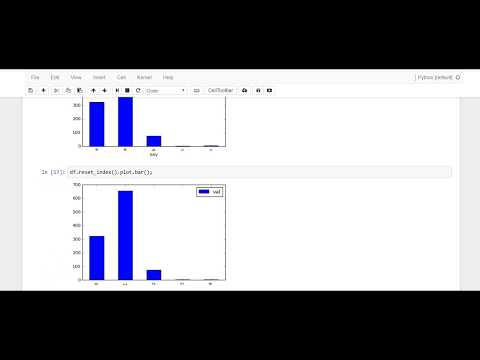

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("kE7WyXe_odc")

In [1]:
# import libraries
import pandas as pd
import sys

Here are the versions of these libraries I'm currently running on.

In [2]:
# print library versions
print('Python: ' + sys.version.split('|')[0])
print('Pandas: ' + pd.__version__)

Python: 3.5.1 
Pandas: 0.23.4


Let's start by creating a very simple data set. If you have looked at my other blog posts, you will notice I use a very similar key/val data set. It's simple and it usually allows me to show you a neat Pandas technique.

In [3]:
# create dataframe
df = pd.DataFrame({'key':['a','a','b','c','c'],
                   'val':[234,456,7,57,3]})

#print
df

,key,val
0,a,234
1,a,456
2,b,7
3,c,57
4,c,3


To see the index, you can just call the ***index*** method as shown below. At the moment Pandas is just using the default integer index. It starts at zero and then moves up incrementally.

In [4]:
df.index

RangeIndex(start=0, stop=5, step=1)

You can also get some index information from the ***.info()*** method. 

    RangeIndex: 5 entries, 0 to 4
    
It's similar to the .index results but the data is presented in a different way.  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
key    5 non-null object
val    5 non-null int64
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


If we wanted to make the column named ***key*** the index, we then use the ***set_index function*** and pass in the name of the key column. Note that we have not changed the df dataframe at this point. If we wanted to actually apply the change to the df, you would have to pass the ***inplace=True*** parameter.

In [6]:
df.set_index('key')

,val
key,
a,234
a,456
b,7
c,57
c,3


Just to show you that the dataframe has not changed, let's print it.

In [7]:
df

,key,val
0,a,234
1,a,456
2,b,7
3,c,57
4,c,3


When I want to apply a new index to my dataframe, I simply set the df variable equal to the set_index command.

In [8]:
# setting te index
df = df.set_index('key')
df

,val
key,
a,234
a,456
b,7
c,57
c,3


If we now look at the .index and .info() methods, you will see things look a bit different. Our index now has a name (the name of the column key) and we are provided the actual values inside the index. The .info() method gives us more of a summary. It tells us that we have 5 rows in the index and that the values range from the letter a to the letter c.

> Note that setting the index removed the column from the dataframe.

In [9]:
df.index

Index(['a', 'a', 'b', 'c', 'c'], dtype='object', name='key')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to c
Data columns (total 1 columns):
val    5 non-null int64
dtypes: int64(1)
memory usage: 80.0+ bytes


<h3>How Do We Change the Index Name?</h3>

We just saw that the index name will be equal to the name of the column we used as the input parameter. If you wanted to change the index name then keep reading to learn how.

Index has a name method that when you call it, it simply gives you the name of the index as it currently stands.

In [11]:
# get index name
df.index.name

'key'

But if we wanted to change it all we have to do is set it to a new name of your choice. In the example below, we will be using the word ***test***. Notice that as soon as we set the name, we have commited the changes. In other words, the dataframe's index name has been changed.

In [12]:
# set index name
df.index.name = 'test'

To verify the name change became effective as soon as you ran the code above, let's query the index once again. Perfect! the name changed as expected.

In [13]:
df.index

Index(['a', 'a', 'b', 'c', 'c'], dtype='object', name='test')

I will admit that I didn't know the technique below. But there is another way to change the index name and that is using the ***.rename_axis()*** method. Just pass in a string and your index name will be changed. Now the big difference here is that we need to set the df variable to the result of rename_axis or your dataframe's index name will not get changed. Again, it just takes time to remember what gets changed on a copy versus what gets changed in place.

In [14]:
# change the name of the index
df = df.rename_axis('new')

Becuase I am usually on paranoid mode, I would double check everytihng looks good. Running the df.index command will confirm the name property was changed. Hooray!

In [15]:
df.index

Index(['a', 'a', 'b', 'c', 'c'], dtype='object', name='new')

<h2>What Does reset_index Do in Pandas?</h2>

What if we wanted to revert back to our original dataframe. What if we didn't want the key column to be part of the index. Can we go back? Yes!

This is what the ***.reset_index()*** function will do for us. It will essentially place our dataframe back to the default settings. In other words, it will remove any existing indexes and go back to the plain RangeIndex we had a few code cells ago.

Let's give it a try.

In [16]:
df.reset_index()

,new,val
0,a,234
1,a,456
2,b,7
3,c,57
4,c,3


It worked, but like I mentioned earlier, your actual dataframe did not change. Let me show you.

Say what??? Yes, you have to pass in the ***inplace=True*** parameter to actually change the df variable. This might seem a bit annoying but the advantage is that you can do on the fly manipulations to your dataframe withought actually affecting your actual dataframe. You are esentially working off a copy of your data. I think this is pretty cool. You just have to be aware when you are working off a copy and when you are working off the actual dataframe.

In [17]:
df

,val
new,
a,234
a,456
b,7
c,57
c,3


Another interesting twist of events is the column name. We started with a column named **key**, it then became the index, and finally we brougt it back as a column. But it came back with a different name. I thought we were resetting the darn thing! We are but I guess we are not exactly undoing our work. Pandas does not know we just changed the name of the index. It will just simply use the current name and use that to name the column. So just note that if you have modified the name of the dataframe's index, your column name will change if you move the data back to a column.

In [18]:
df = df.reset_index()
df

,new,val
0,a,234
1,a,456
2,b,7
3,c,57
4,c,3


<h2>How to Reset the Index After a GroupBy Operation</h2>

GroupBy opreations are pretty common and there are times were you may want to reset the index. Here is an example.

Let's do a basic group by sum and place the resulting dataframe in a new vaiable we will call ***df_sum***.

In [19]:
# groupby sum
df_sum = df.groupby('new').sum()
df_sum

,val
new,
a,690
b,7
c,60


Looking at the results from the two code cells below, we can see that the column we just grouped by (column new) is now the index of df_sum. So when you do a groupby operation, you are also creating a new index.

In [20]:
df_sum.index

Index(['a', 'b', 'c'], dtype='object', name='new')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
new    5 non-null object
val    5 non-null int64
dtypes: int64(1), object(1)
memory usage: 160.0+ bytes


As you probably have already guessed, by applying the ***.reset_index()*** method, we retain the result of the groupby but bring the index back into the column area. 

In [22]:
df_sum.reset_index()

,new,val
0,a,690
1,b,7
2,c,60


For those that are wondering... yes, the df variable has not changed.

In [23]:
df

,new,val
0,a,234
1,a,456
2,b,7
3,c,57
4,c,3


And yes, we cold have performed all of this using a one liner as shown below. Ninja stuff right there.

In [24]:
df.groupby('new').sum().reset_index()

,new,val
0,a,690
1,b,7
2,c,60


<h3>Can we also Rename the Index on the Fly?</h3>

Let's say you didn't want the column to be called **new** and wanted it t be caled **val**. The code below will make that happen.

In [25]:
df.groupby('new').sum().rename_axis('key').reset_index()

,key,val
0,a,690
1,b,7
2,c,60


For those still not convinced, we still have not touched the df variable.

In [26]:
df

,new,val
0,a,234
1,a,456
2,b,7
3,c,57
4,c,3


<h3>How Can I Keep the Column After the Index is Set?</h3>

By default, Pandas will drop the column that will become the index. If you still wanted to keep the column in place, we need to set the ***drop parameter*** to False.

In [27]:
# keep index column
df.set_index('new', drop=False)

,new,val
new,,
a,a,234
a,a,456
b,b,7
c,c,57
c,c,3


<h3>How Can I Add a new Column as the Index?</h3>

Like I have shown already, we usually get a new index from a column we already have. But there are enough of you who have wondered how to add a new column as the index. Let's go through an example to see what I mean. 

In [28]:
# our current dataframe
df

,new,val
0,a,234
1,a,456
2,b,7
3,c,57
4,c,3


The trick to get it to work is to put the new column inside a Python list. Let's create a variable named key. Make sure the length of the new column matches the length of the existing dataframe. Making the new column shorter or longer will return an error.

In [29]:
# new column that will become the index
key = ['d', 'd', 'd', 'e', 'e']
key

['d', 'd', 'd', 'e', 'e']

You must put the variable ***key*** inside a list for this to work.

In [30]:
# create a new index using the key variable
df.set_index([key])

,new,val
d,a,234
d,a,456
d,b,7
e,c,57
e,c,3


<h3>Is There a Way to Sort the Index?</h3>

We've already learned about [sorting dataframes in a previous blog](https://blog.hedaro.com/pandas-sort.html). But what about sorting an index? Is there a difference? Well yes, that's why I'm bringing it up. Pandas provides us with the ***.sort_index()*** function to do just that. 

The code below will sort the index descending. Not that bad...

In [31]:
df.set_index('new').sort_index(ascending=False)

,val
new,
c,57
c,3
b,7
a,234
a,456


<h2>How Do We Create an Index Using Multiple Columns?</h2>

There are times were you may want to get a little crazy and venture into the hierarchical madness. I'm making a big fuss because things tend to get trickier as soon as you start to go beyond the basics. Luckily making multiple columns your new index is not so bad. 

We are going to need to add a third column to make this example work. The goal here is to make the columns new and color be the new index of our dataframe. 

In [32]:
# add a third column
df['color'] = ['orange','orange','orange','blue','blue']
df

,new,val,color
0,a,234,orange
1,a,456,orange
2,b,7,orange
3,c,57,blue
4,c,3,blue


If we place the column names in a list, voila! We have our multi index. 
> Now go ahead and flex your muscles, you are crushing it! (I make myself laugh all the time)

In [33]:
df.set_index(['new','color'])

val
new color      
a   orange  234
    orange  456
b   orange    7
c   blue     57
    blue      3

<h3>Why Index Matters When Plotting</h3>

So I made you go thorugh a bunch of examples to get to plotting. And this is a very clear example of when having an index matters.

In [34]:
# turn on inline plotting
%matplotlib inline

Let's plot df and see what happens. 

In [35]:
df

,new,val,color
0,a,234,orange
1,a,456,orange
2,b,7,orange
3,c,57,blue
4,c,3,blue


Pandas decided to plot the column that contains numbers. That makes sense.

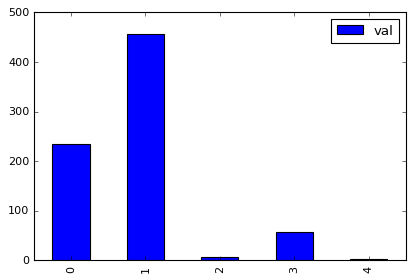

In [36]:
# simple plot
df.plot.bar();

Wouldn't it be nice if we can use the ***color*** column as the values for the X axis? And this is where the light bulbs should turn on for you. Do you see where I'm going here?

Yes, if we make the color column the index, Pandas will place it in the X axis of the plot. Very nice!

If you missed my [blog on creating plots with Pandas](https://blog.hedaro.com/Create-Pandas-Visualization.html), don't forget to check it out.

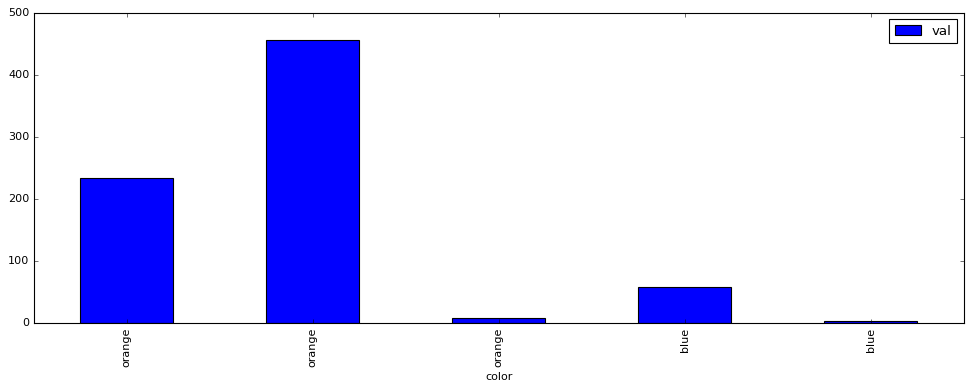

In [37]:
df.set_index('color').plot.bar(figsize=(15,5));

<h4>Concluding with Dates</h4>

I wanted to end the tutorial at plotting, but dates and the index have to be included in this conversation. See, as soon as you place a datetime column into the index spot, you now have the ability to slice and dice your data like you never have been able before. What do I mean? Let's get an example going.

In [38]:
# create a df with a date column
df = pd.DataFrame({'key':pd.date_range(start='2018-11-25', end='2018-12-02'),
                   'val':[234,456,768,435,34,76,4,8]})

df

,key,val
0,2018-11-25,234
1,2018-11-26,456
2,2018-11-27,768
3,2018-11-28,435
4,2018-11-29,34
5,2018-11-30,76
6,2018-12-01,4
7,2018-12-02,8


As you can see the column named ***key*** contains dates. 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
key    8 non-null datetime64[ns]
val    8 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 208.0 bytes


Now we then set the index equal to key. This is where the magic happens.

In [40]:
# set column as index
df = df.set_index('key')
df

,val
key,
2018-11-25,234
2018-11-26,456
2018-11-27,768
2018-11-28,435
2018-11-29,34
2018-11-30,76
2018-12-01,4
2018-12-02,8


Let's filter by all the dates in December.

In [41]:
df['2018-12']

,val
key,
2018-12-01,4
2018-12-02,8


Let's filter by all the dates in November.

In [42]:
df['2018-11']

,val
key,
2018-11-25,234
2018-11-26,456
2018-11-27,768
2018-11-28,435
2018-11-29,34
2018-11-30,76


What about selecting dates between November 26th and November 29th? Crazy amazing! You can even filter by year alone.

In [43]:
df['2018-11-26':'2018-11-29']

,val
key,
2018-11-26,456
2018-11-27,768
2018-11-28,435
2018-11-29,34


I hope I've blown your head with all of these possibilities. It's the amazing and at times frustrating thing about Pandas. 

> There are so many ways to perform the same action that it starts taking an art form.

This is it for now, if you have any questions about the Pandas set index function, go ahead and leave me a comment below.

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>